# `pyRemoval` package usage demostation

## Processing a video with different filters

### Import the required modules

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pyRemoval.processing.converter import apply_filter
from pyRemoval.processing.filters import medianblur, peppernoise, timeblur_sliding
from pyRemoval.processing.extract import facial_roi

### Define input path

In [2]:
input_path = '/Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/sample_video.avi'

In [3]:
def display_frame_from_video(input_path, title=None):
    '''
    This functions display a frame from the video at the half point of the video.

    This function is only for the purpose of demonstration in this notebook.
    '''
    # Read the Video (Change the filename as per your file)
    cap = cv2.VideoCapture(input_path)

    # Get the total number of frames
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    half_point = length//2 # Approximately half if number of frames are odd

    # Set the reader to the given frame number (half_point)
    cap.set(cv2.CAP_PROP_POS_FRAMES, half_point)

    # Read the frame
    ret, frame = cap.read()

    # Release the file pointer
    cap.release()

    # convert the frame from BGR to RGB color space
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # normalize the frame
    frame_rgb = frame_rgb / 255.0

    # display the frame using matplotlib
    if title:
        plt.title(title)
    plt.axis('off')
    plt.imshow(frame_rgb)

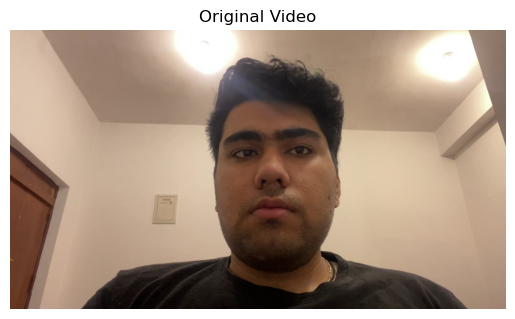

In [4]:
frame = display_frame_from_video(input_path, title='Original Video')

### Define the Region of Interest (ROI)

In [5]:
roi_func = facial_roi # Face - (Mouth + Eyes)

#### Median Blur Filter

In [6]:
# Define filter and filter parameters
filter_func = medianblur
filter_temporal = False
filter_params = {'kernel_size': 5}

# Define output path
output_path = '/Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/medianblur.avi'

# Apply filter
%time apply_filter(input_path, output_path, filter_func, filter_temporal, roi_func, filter_params, notebook_mode=True) 

Starting video conversion...



  0%|          | 0/464.0 [00:00<?, ?it/s]

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Conversion completed successfully!
Video saved at: /Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/medianblur.avi
CPU times: user 38.6 s, sys: 7.98 s, total: 46.6 s
Wall time: 41.7 s


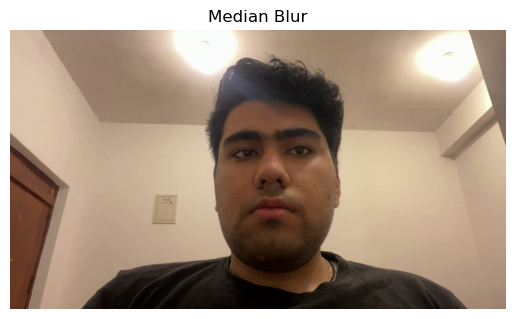

In [7]:
display_frame_from_video(output_path, title='Median Blur')

**Note**: The output file can be very large, because the video is saved in the original resolution without any compression to avoid any loss of quality. Only use `.avi` format for the output formats.

#### Pepper Noise Filter

In [8]:
# Define filter and filter parameters (no parameters in this case)
filter_func = peppernoise
filter_temporal = False
filter_params = {'amount': 0.05}

# path to store the processed video
output_path = '/Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/peppernoise.avi'

# Apply filter
%time apply_filter(input_path, output_path, filter_func, filter_temporal, roi_func, filter_params, notebook_mode=True) 

Starting video conversion...



  0%|          | 0/464.0 [00:00<?, ?it/s]

Conversion completed successfully!
Video saved at: /Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/peppernoise.avi
CPU times: user 1min 44s, sys: 59.1 s, total: 2min 43s
Wall time: 2min 51s


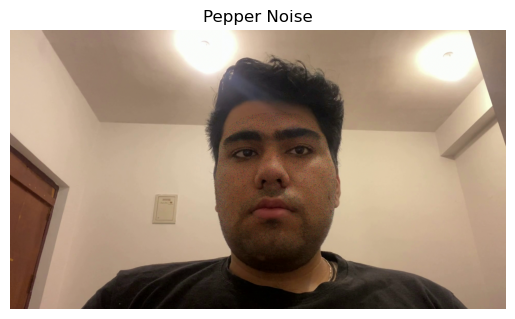

In [9]:
display_frame_from_video(output_path, title='Pepper Noise')

#### Time Blur Sliding Window Filter

In [10]:
# Define filter and filter parameters
filter_func = timeblur_sliding
filter_temporal = 'timeblur_sliding'
filter_params = {'window_size': 5}

# path to store the processed video
output_path = '/Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/timeblur_sliding.avi'

# Apply filter
%time apply_filter(input_path, output_path, filter_func, filter_temporal, roi_func, filter_params, notebook_mode=True) 

Starting video conversion...



  0%|          | 0/464.0 [00:00<?, ?it/s]

Conversion completed successfully!
Video saved at: /Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/timeblur_sliding.avi
CPU times: user 2min, sys: 1min 24s, total: 3min 25s
Wall time: 3min 30s


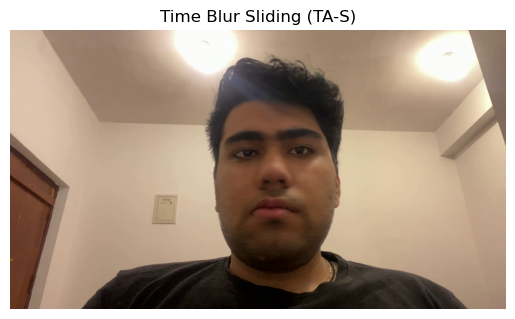

In [11]:
display_frame_from_video(output_path, title='Time Blur Sliding (TA-S)')

### Creating a new filter

This demonstates how to create a new filter using the `pyRemoval` package. For the purpose of the demonstration, we will create a simple filter that will remove the green color from the video.


Note: The function should take in the image and the parameters as input and return the filtered image. If the filter has a temporal component (relies on multiple frames), then modifications to the [`apply_filter`](https://github.com/saksham2001/rPPG-removal/blob/0a089341738981ceaa76a0e8074f39a049d411fd/pyRemoval/processing/converter.py#L11) function in [`pyRemoval/processing/converter.py`](https://github.com/saksham2001/rPPG-removal/blob/main/pyRemoval/processing/converter.py#L11) might be required. For boilerplate code, refer to the [`boilerplate_filter`](https://github.com/saksham2001/rPPG-removal/blob/e7e4e0fff578a3d6072bda3198f6c1049d18ad89/pyRemoval/processing/filters.py#L287) function. After creating your own filter simply change the import statment in your file to test your filter.

In [12]:
def remove_green_channel(frame, filter_params=None):
    '''
    This simple filter removes the green channel from the video. 
    Since, there are no parameters, the filter_params is none.
    '''

    # Remove the green channel
    frame[:, :, 1] = 0

    return frame


In [13]:
filter_func = remove_green_channel
filter_temporal = False
filter_params = None

# path to store the processed video
output_path = '/Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/remove_green_channel.avi'

# Apply filter
%time apply_filter(input_path, output_path, filter_func, filter_temporal, roi_func, filter_params, notebook_mode=True)

Starting video conversion...



  0%|          | 0/464.0 [00:00<?, ?it/s]

Conversion completed successfully!
Video saved at: /Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/remove_green_channel.avi
CPU times: user 35.5 s, sys: 8.11 s, total: 43.6 s
Wall time: 43.4 s


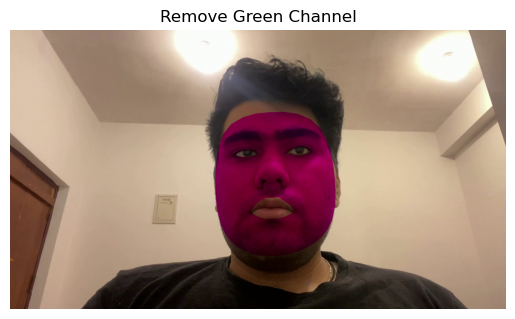

In [14]:
display_frame_from_video(output_path, title='Remove Green Channel')

## Measure the Mean Square Error (MSE) between the original and the processed video

### Import the required modules

In [15]:
from pyRemoval.utils.image import compute_errors
from pyRemoval.metrics.infoloss import mse

### Define path of the videos

In [16]:
original_video_path = '/Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/sample_video.avi'
modified_video_path = '/Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/peppernoise.avi'

### Measure MSE

In [17]:
%time mse_val = compute_errors(original_video_path, modified_video_path, metric=mse, notebook_mode=True)

print('Average MSE: {:.2f}'.format(mse_val))

Computing metric between videos...


  0%|          | 0/464 [00:00<?, ?it/s]

CPU times: user 19.6 s, sys: 4.51 s, total: 24.1 s
Wall time: 28.9 s
Average MSE: 77.20


### Creating a new metric function to compare the loss of information between videos

This demonstates how to create a new metric function using the `pyRemoval` package. For the purpose of the demonstration, we will use Structural similarity index (SSIM) as a metric to compare the loss of information between videos.

Note: The function should take in the original image and the filtered image as input and return the metric value. For boilerplate code, refer to the [`boilerplate_metric`](https://github.com/saksham2001/rPPG-removal/blob/e7e4e0fff578a3d6072bda3198f6c1049d18ad89/pyRemoval/metrics/infoloss.py#L27). After creating your own metric function simply change the import statment in your file to test your metric.

In [18]:
from skimage.metrics import structural_similarity

def ssim_metric(frame1, frame2):
    '''
    This function computes the Structural Similarity Index (SSIM) between two frames.
    '''
    return structural_similarity(frame1, frame2, win_size=3)

In [19]:
%time ssim_val = compute_errors(original_video_path, modified_video_path, metric=ssim_metric, notebook_mode=True)

print('Average SSIM: {:.2f}'.format(ssim_val))

Computing metric between videos...


  0%|          | 0/464 [00:00<?, ?it/s]

CPU times: user 6min 24s, sys: 53.4 s, total: 7min 17s
Wall time: 7min 28s
Average SSIM: 0.98


## Measure the runtime speed of the filters

### Import the required modules

In [20]:
from pyRemoval.processing.converter import apply_filter_live
from pyRemoval.processing.filters import peppernoise
from pyRemoval.processing.extract import selected_facial_roi
from pyRemoval.metrics.speed import fps

### Define the parameters

In [21]:
filter_func = peppernoise
filter_temporal = False
roi_func = selected_facial_roi
filter_params = {}

### Measure the fps

In [23]:
%time fps_list = apply_filter_live(filter_func, filter_temporal, roi_func, filter_params, metric=fps, display=False, frames_to_process=1000, notebook_mode=True)

print('\nAverage FPS: {:.2f}'.format(sum(fps_list)/len(fps_list)))

Starting live conversion...



  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 2min 6s, sys: 56.8 s, total: 3min 3s
Wall time: 3min 31s

Average FPS: 4.83


To use create a new metric add the function to pyRemoval/processing/metrics.py file, import the function here and use it by changing the `metric
` variable.

### Creating a new metric function to measure the speed of processing a video

This demonstates how to create a new metric function using the `pyRemoval` package. For the purpose of the demonstration, we will use the time taken to process a video as a metric to measure the speed of processing a video.

Note: The function requires the previous time and the current time as inputs and return the metric value. For boilerplate code, refer to the [`boilerplate_metric`](https://github.com/saksham2001/rPPG-removal/blob/e7e4e0fff578a3d6072bda3198f6c1049d18ad89/pyRemoval/metrics/speed.py#L26). After creating your own metric function simply change the import statment in your file to test your metric.

In [24]:
def time_taken(prev_time, new_time):
    '''
    This function computes the time taken between two frames.
    '''
    return new_time - prev_time

In [25]:
%time time_taken_lst = apply_filter_live(filter_func, filter_temporal, roi_func, filter_params, metric=time_taken, display=False, frames_to_process=1000, notebook_mode=True)

print('\nAverage Time Taken: {:.2f}'.format(sum(time_taken_lst)/len(time_taken_lst)))

Starting live conversion...



  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 2min 7s, sys: 59.5 s, total: 3min 7s
Wall time: 3min 32s

Average Time Taken: 0.21


## Testing different ROIs

In [26]:
from pyRemoval.processing.extract import full_roi, selected_facial_roi

### Full Frame as ROI (Full Frame)

In [27]:
filter_func = remove_green_channel
filter_temporal = False
filter_params = None
roi_func = full_roi

# path to store the processed video
output_path = '/Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/full_frame_roi.avi'

# Apply filter
%time apply_filter(input_path, output_path, filter_func, filter_temporal, roi_func, filter_params, notebook_mode=True)

Starting video conversion...



  0%|          | 0/464.0 [00:00<?, ?it/s]

Conversion completed successfully!
Video saved at: /Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/full_frame_roi.avi
CPU times: user 10.6 s, sys: 1.43 s, total: 12 s
Wall time: 12.6 s


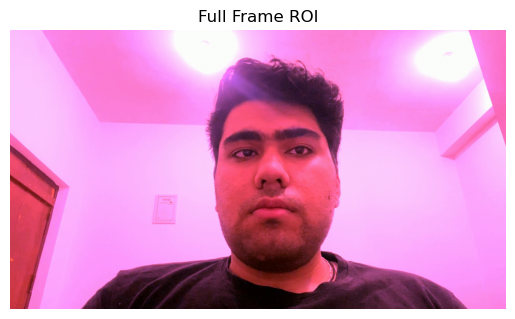

In [28]:
display_frame_from_video(output_path, title='Full Frame ROI')

### Selected Facial ROI (Forehead+Cheeks)

In [29]:
filter_func = remove_green_channel
filter_temporal = False
filter_params = None
roi_func = selected_facial_roi

# path to store the processed video
output_path = '/Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/selected_facial_roi.avi'

# Apply filter
%time apply_filter(input_path, output_path, filter_func, filter_temporal, roi_func, filter_params, notebook_mode=True)

Starting video conversion...



  0%|          | 0/464.0 [00:00<?, ?it/s]

Conversion completed successfully!
Video saved at: /Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/selected_facial_roi.avi
CPU times: user 36.4 s, sys: 8.61 s, total: 45 s
Wall time: 40.6 s


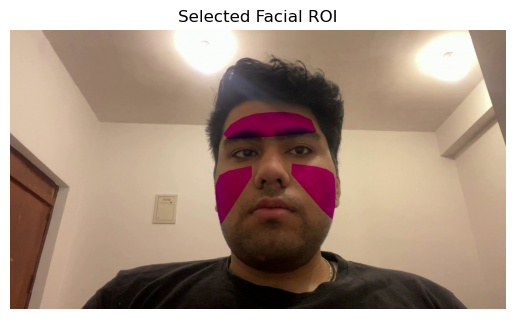

In [30]:
display_frame_from_video(output_path, title='Selected Facial ROI')

### Creating a new ROI

This demonstates how to create a new ROI using the `pyRemoval` package. For the purpose of the demonstration, we will create a simple ROI as a box in the center of the frame.

Note: The function should take in the frame and frame dimensions as input and return the region of interest as a mask. For boilerplate code, refer to the [`boilerplate_roi`](https://github.com/saksham2001/rPPG-removal/blob/e7e4e0fff578a3d6072bda3198f6c1049d18ad89/pyRemoval/processing/extract.py#L130). After creating your own ROI function simply change the import statment in your file to test your ROI.

In [31]:
def box_roi(frame, frame_height, frame_width):
    '''
    This function creates a small box in the center of the frame as the ROI.
    '''

    # create an empty mask
    mask = np.zeros((frame_height, frame_width), dtype=np.uint8)
    
    # Define the box dimensions
    box_height = frame_height//4
    box_width = frame_width//4

    # Define the box coordinates
    top_left_x = frame_width//2 - box_width//2
    top_left_y = frame_height//2 - box_height//2
    bottom_right_x = frame_width//2 + box_width//2
    bottom_right_y = frame_height//2 + box_height//2

    # Draw the box in the mask (all the pixels inside the ROI are white)
    mask[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = 255

    return mask


In [32]:
filter_func = remove_green_channel
filter_temporal = False
filter_params = None
roi_func = box_roi

# path to store the processed video
output_path = '/Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/box_roi.avi'

# Apply filter
%time apply_filter(input_path, output_path, filter_func, filter_temporal, roi_func, filter_params, notebook_mode=True)

Starting video conversion...



  0%|          | 0/464.0 [00:00<?, ?it/s]

Conversion completed successfully!
Video saved at: /Users/sakshambhutani/PycharmProjects/MachineLearning/Other/ETH BMHT/rPPG-removal/data/box_roi.avi
CPU times: user 10.6 s, sys: 1.21 s, total: 11.8 s
Wall time: 12.4 s


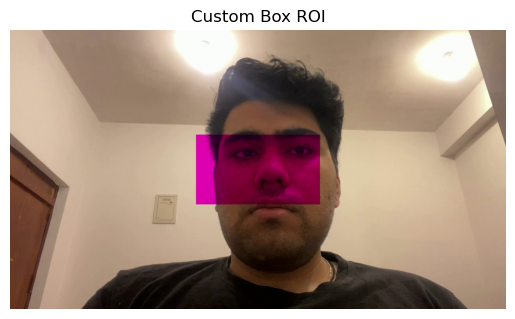

In [33]:
display_frame_from_video(output_path, title='Custom Box ROI')